In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
def import_stuff2(file_name):
    return_df = pd.read_csv(file_name+".csv", parse_dates=['datetime'], index_col=['datetime'])
    return_df = return_df.replace({'discharge':0}, 1e-2)    
    precip_df = pd.read_csv(file_name+"_precip.csv")

    return_df["discharge"] = return_df["discharge"] 
    return_df["unit_discharge"] = return_df["discharge"] 
    return_df["precip"] = np.array(precip_df["DataValue"])
    return_df = return_df.replace({'precip':-9999}, 0)
    return return_df

In [20]:
loc_name = "data/hawaii/"

kamananui = import_stuff2(loc_name+"kamananui")
honolii= import_stuff2(loc_name+"honolii")

In [21]:
honolii = honolii.truncate(before='2016-11-01', after='2017-07-30')
kamananui = kamananui.truncate(before='2016-11-01', after='2017-07-30')

In [28]:
#%%
def plot_precip_discharge(df_name, ur_color):
    fig, ax1 = plt.subplots(figsize=(10,5))
    ax1.set_ylabel('precip (mm/day)', fontsize=14 )  # we already handled the x-label with ax1
    ax1.bar(df_name.index,df_name["precip"], width=3)

    ydata=np.array(df_name["precip"])
    ax1.invert_yaxis()
    ax1.set_ylim([200, 0])
    ax1.tick_params(axis='y')
      
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax2.set_xlabel('time')
    ax2.set_ylabel('discharge (m$^3$/s)', fontsize=14)
    ax2.plot(df_name.index, df_name["discharge"], linewidth=1.75, marker="*", color = ur_color, label="VT")
    ax2.set_yscale('log')
    ax2.set_ylim([0.1, 5000])
    ax2.set_xlim([df_name.index[0], df_name.index[-1]])
    ax2.tick_params(axis='y')
    plt.grid()
    plt.show()
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

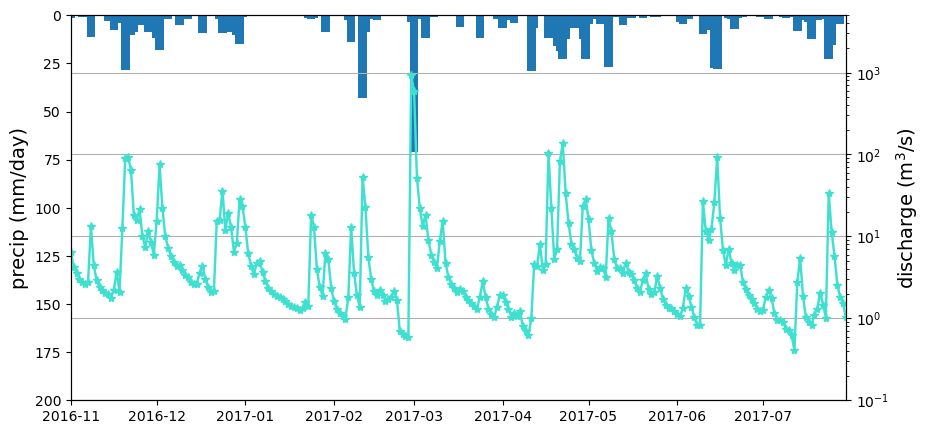

In [29]:
plot_precip_discharge(kamananui, ur_color = "turquoise")

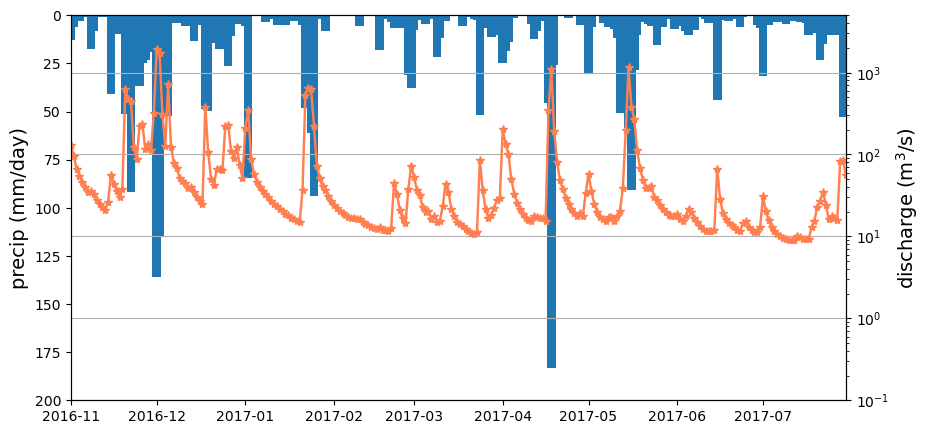

In [30]:
plot_precip_discharge(honolii, ur_color = "coral")

In [31]:
np.sum(kamananui["precip"])

836.9

In [32]:
np.sum(honolii["precip"])

2848.8

***** Note there is something majorly fucked about the precipitation in the figure above. There is no way there is 200 mm/day of precip.

In [12]:
#%%
def plot_precip_discharge_double(df_name1, ur_color1):
    #fig, ax1 = plt.subplots(figsize=(10,5))
    plt.figure(figsize=(7,10))
    plt.subplot(2,1,1)
    ax1 = plt.gca()
    ax1.set_ylabel('precip (mm/day)', fontsize=14 )  # we already handled the x-label with ax1
    ax1.bar(df_name1.index,df_name1["precip"], width=3)

    ydata=np.array(df_name1["precip"])
    # print("max precip", df_name1.index,df_name1["precip"]).max()
    # print(frog)
    ax1.invert_yaxis()
    ax1.set_ylim([200, 0])
    ax1.tick_params(axis='y')
      
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    ax2.set_xlabel('time')
    ax2.set_ylabel('discharge (m$^3$/s)', fontsize=14)
    ax2.plot(df_name1.index, df_name1["discharge"], linewidth=1.75, marker="*", color = ur_color1, label="VT")
    ax2.set_yscale('log')
    ax2.set_ylim([0.1, 100])
    ax2.set_xlim([df_name1.index[0], df_name1.index[-1]])
    ax2.tick_params(axis='y')
    plt.grid()
    plt.show()
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped



In [ ]:
honolii = honolii.truncate(before='2016-11-01', after='2017-07-30')
kamananui = kamananui.truncate(before='2016-11-01', after='2017-07-30')

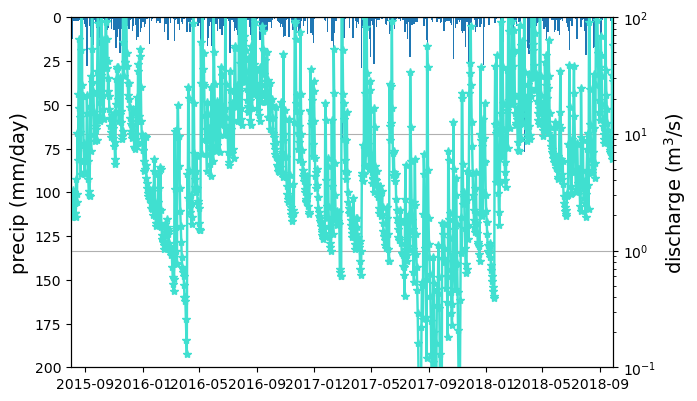

NameError: name 'fig' is not defined

In [13]:
plot_precip_discharge_double(kamananui, ur_color1 = "turquoise")

In [ ]:
plot_precip_discharge(honolii, ur_color = "coral")
